In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine, func
from sqlalchemy import desc
from sqlalchemy import text

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

/var/folders/df/dwj7lm7s3vzgwfn_gv80jsqw0000gn/T/ipykernel_90806/4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [8]:
# View all of the classes that automap found
print(Base.classes.keys())

['station', 'measurement']


In [9]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# View columns in the Measurement table
print("Measurement table columns:")
for column in Measurement.__table__.columns:
    print(column.name, column.type)

# View columns in the Station table
print("\nStation table columns:")
for column in Station.__table__.columns:
    print(column.name, column.type)


Measurement table columns:
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

Station table columns:
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).scalar()
recent_date

'2017-08-23'

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = pd.to_datetime(recent_date) 
one_year_ago = most_recent_date - dt.timedelta(days=365)
one_year_ago

Timestamp('2016-08-23 00:00:00')

In [15]:
# Perform a query to retrieve the data and precipitation scores
start_date_str = one_year_ago.strftime('%Y-%m-%d')

# Declare the SQL query as a text object
query = text("""
SELECT measurement.id AS measurement_id, 
       measurement.station AS measurement_station, 
       measurement.date AS measurement_date, 
       measurement.prcp AS measurement_prcp, 
       measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.date >= :start_date
""")

# string parameter
result = session.execute(query, {'start_date': start_date_str}).fetchall()
result

[(2364, 'USC00519397', '2016-08-23', 0.0, 81.0),
 (2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (2367, 'USC00519397', '2016-08-26', 0.0, 79.0),
 (2368, 'USC00519397', '2016-08-27', 0.0, 77.0),
 (2369, 'USC00519397', '2016-08-28', 0.01, 78.0),
 (2370, 'USC00519397', '2016-08-29', 0.0, 78.0),
 (2371, 'USC00519397', '2016-08-30', 0.0, 79.0),
 (2372, 'USC00519397', '2016-08-31', 0.13, 80.0),
 (2373, 'USC00519397', '2016-09-01', 0.0, 81.0),
 (2374, 'USC00519397', '2016-09-02', 0.0, 80.0),
 (2375, 'USC00519397', '2016-09-03', 0.0, 79.0),
 (2376, 'USC00519397', '2016-09-04', 0.03, 75.0),
 (2377, 'USC00519397', '2016-09-05', None, 79.0),
 (2378, 'USC00519397', '2016-09-06', None, 76.0),
 (2379, 'USC00519397', '2016-09-07', 0.05, 76.0),
 (2380, 'USC00519397', '2016-09-08', 0.0, 80.0),
 (2381, 'USC00519397', '2016-09-09', 0.03, 79.0),
 (2382, 'USC00519397', '2016-09-10', 0.0, 78.0),
 (2383, 'USC00519397', '2016-09-11', 0.05, 76.0),
 (2384, 'U

In [16]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
query = text("""
SELECT measurement.id AS measurement_id, 
       measurement.station AS measurement_station, 
       measurement.date AS measurement_date, 
       measurement.prcp AS measurement_prcp, 
       measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.date >= :start_date
""")

# Execute the query
result = session.execute(query, {'start_date': start_date_str}).fetchall()

# Create DataFrame from the result
precip_df = pd.DataFrame(result,
                         columns=["id", "station", "date", "prcp", "tobs"])
precip_df

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0
...,...,...,...,...,...
2225,19546,USC00516128,2017-08-19,0.09,71.0
2226,19547,USC00516128,2017-08-20,NaN,78.0
2227,19548,USC00516128,2017-08-21,0.56,76.0
2228,19549,USC00516128,2017-08-22,0.50,76.0


In [17]:
# Sort the dataframe by date
precip_date = pd.DataFrame(precip_df, columns=['date', 'prcp'])
precip_date.sort_values('date', inplace=True)
precip_date.set_index('date', inplace=True)
precip_date

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


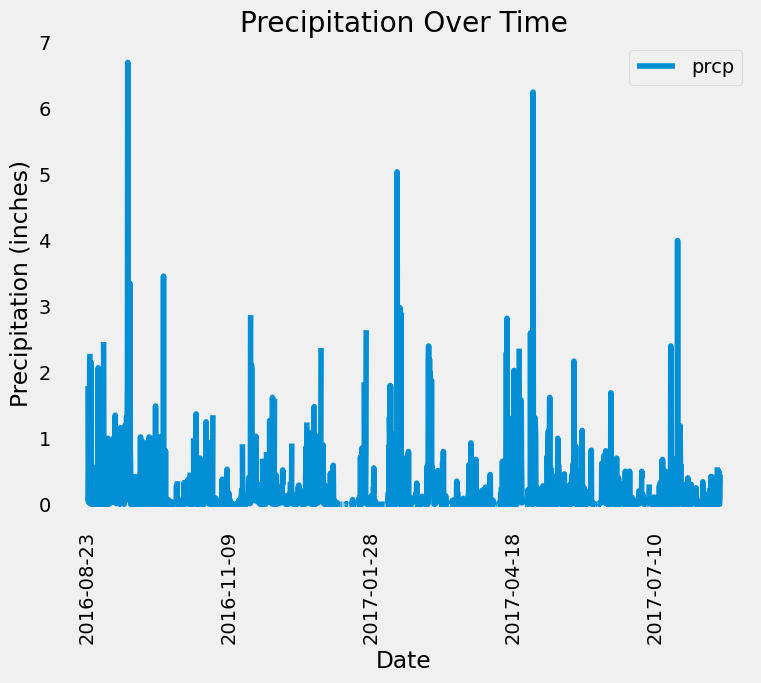

In [18]:
# Plotting the DataFrame
precip_date.plot(kind='line', figsize=(8, 6))
plt.title('Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.grid()
plt.xticks(rotation=90)
plt.legend(loc="best")
plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_summary_df = precip_date['prcp'].describe().to_frame()
precip_summary_df

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
stations = [(session.query(Measurement.station).group_by(Measurement.station).count(),)]
print(stations)

[(9,)]


In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_stations = (session.query(Measurement.station, func.count(Measurement.station))
                   .group_by(Measurement.station)
                   .order_by(desc(func.count(Measurement.station))).all())

# Print the results
for station, count in active_stations:
    print(f"Station: {station}, Count: {count}")


Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Get the most active station ID (the first entry in active_stations)
most_active_station_id = active_stations[0][0]

# Query to calculate lowest, highest, and average temperature for the most active station
temperature_stats = (
    session.query(
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs)
    )
    .filter(Measurement.station == most_active_station_id)
    .one()
)

# Extract the results
lowest_temp, highest_temp, avg_temp = temperature_stats

# Print the results
print(f"Station ID: {most_active_station_id}")
print(f"Lowest Temperature: {lowest_temp}")
print(f"Highest Temperature: {highest_temp}")
print(f"Average Temperature: {avg_temp}")


Station ID: USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


In [24]:
# Using the most active station id, Query the last 12 months of temperature observation data for this station
# Convert the most recent date to a string in 'YYYY-MM-DD' format
one_year_ago_str = one_year_ago.strftime('%Y-%m-%d')

# Query the last 12 months of temperature observations for the most active station
temperature_data = (
    session.query(Measurement.tobs)
    .filter(Measurement.station == most_active_station_id)
    .filter(Measurement.date >= one_year_ago_str)
    .all()
)

# Extract temperatures from the query result
temperatures = [temp[0] for temp in temperature_data]

temperatures  # Display the result



[77.0,
 77.0,
 80.0,
 80.0,
 75.0,
 73.0,
 78.0,
 77.0,
 78.0,
 80.0,
 80.0,
 78.0,
 78.0,
 78.0,
 73.0,
 74.0,
 80.0,
 79.0,
 77.0,
 80.0,
 76.0,
 79.0,
 75.0,
 79.0,
 78.0,
 79.0,
 78.0,
 78.0,
 76.0,
 74.0,
 77.0,
 78.0,
 79.0,
 79.0,
 77.0,
 80.0,
 78.0,
 78.0,
 78.0,
 77.0,
 79.0,
 79.0,
 79.0,
 79.0,
 75.0,
 76.0,
 73.0,
 72.0,
 71.0,
 77.0,
 79.0,
 78.0,
 79.0,
 77.0,
 79.0,
 77.0,
 78.0,
 78.0,
 78.0,
 78.0,
 77.0,
 74.0,
 75.0,
 76.0,
 73.0,
 76.0,
 74.0,
 77.0,
 76.0,
 76.0,
 74.0,
 75.0,
 75.0,
 75.0,
 75.0,
 71.0,
 63.0,
 70.0,
 68.0,
 67.0,
 77.0,
 74.0,
 77.0,
 76.0,
 76.0,
 75.0,
 76.0,
 75.0,
 73.0,
 75.0,
 73.0,
 75.0,
 74.0,
 75.0,
 74.0,
 75.0,
 73.0,
 75.0,
 73.0,
 73.0,
 74.0,
 70.0,
 72.0,
 70.0,
 67.0,
 67.0,
 69.0,
 70.0,
 68.0,
 69.0,
 69.0,
 66.0,
 65.0,
 68.0,
 62.0,
 75.0,
 70.0,
 69.0,
 76.0,
 76.0,
 74.0,
 73.0,
 71.0,
 74.0,
 74.0,
 72.0,
 71.0,
 72.0,
 74.0,
 69.0,
 67.0,
 72.0,
 70.0,
 64.0,
 63.0,
 63.0,
 62.0,
 70.0,
 70.0,
 62.0,
 62.0,
 63.0,
 65.0,

In [25]:
tobs_data = pd.DataFrame(temperatures, columns=['tobs'])
tobs_data

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


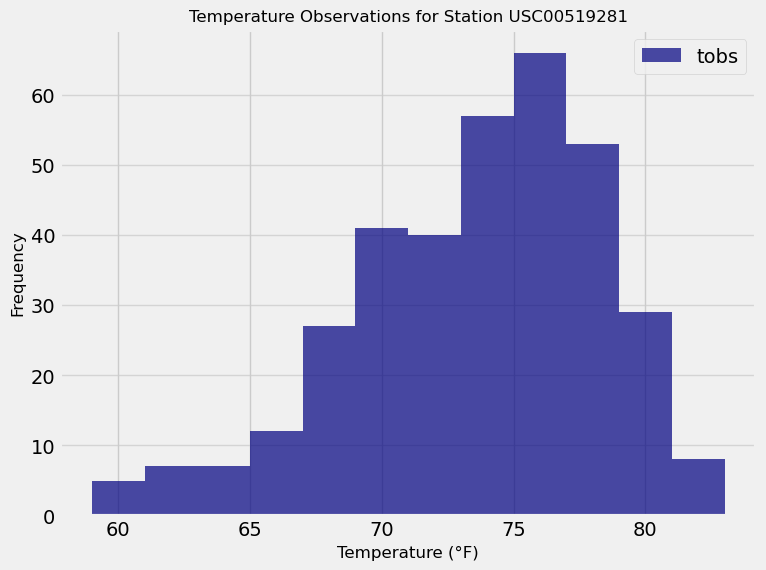

In [29]:
# Using the most active station id, plot the results as a histogram
plt.figure(figsize=(8, 6))
plt.hist(tobs_data['tobs'], bins=12, alpha=0.7, color='navy', label='tobs')
plt.title(f'Temperature Observations for Station {most_active_station_id}', fontsize=12)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.legend(loc="best")
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()